In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

This notebook selects the dimension and preprocess all the data into trainable values. 

## 1. Loading dataset

In [48]:
dataset_df = pd.read_csv('data/filtered_nrel.csv', delimiter='\t')
print('Dataset shape: ', dataset_df.shape)

Dataset shape:  (4608, 62)


The dataset contains 67622 rows and 28 columns. The top 5 rows are shown below.

## 2. Exploratory Data Analysis

In [49]:
dataset_df.drop([
    'Status Code', 'Expected Date', 'EV Other Info', 'EV Network Web',
    'Groups With Access Code', 'Access Detail Code'], axis=1, inplace=True)

KeyError: "['Status Code', 'Expected Date', 'EV Other Info', 'EV Network Web', 'Groups With Access Code', 'Access Detail Code'] not found in axis"

In [ ]:
dataset_df.head()

,Station Name,Street Address,Access Days Time,Cards Accepted,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Network,Latitude,Longitude,...,Open Date,EV Connector Types,Access Code,Facility Type,EV Pricing,EV On-Site Renewable Source,Restricted Access,NPS Unit Name,Maximum Vehicle Class,EV Workplace Charging
0,SULLIVAN-PARKHI 4K,401 W Marketview Dr,24 hours daily,NaN,NaN,2.0,NaN,ChargePoint Network,40.136887,-88.248850,...,2021-12-17,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Terra Savia Winery - Tesla Destination,14160 Mountain House Rd,NaN,NaN,NaN,3.0,NaN,Tesla Destination,38.959887,-123.115359,...,2015-05-05,J1772 TESLA,public,BREWERY_DISTILLERY_WINERY,Free,NaN,NaN,NaN,NaN,False
2,GEORGIA POWER VILLA RICA DC1,584 Highway 61,24 hours daily,NaN,NaN,NaN,1.0,ChargePoint Network,33.718490,-84.938047,...,2021-12-17,CHADEMO J1772COMBO,public,NaN,NaN,NaN,NaN,NaN,NaN,False
3,MAKER'S MARK HOMEPLACE,3350 Burks Spring Rd,24 hours daily,NaN,NaN,2.0,NaN,ChargePoint Network,37.648083,-85.349500,...,2022-09-14,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Chicken Ranch Casino - Tesla Destination,16929 Chicken Ranch Rd,NaN,NaN,NaN,4.0,NaN,Tesla Destination,37.929206,-120.451752,...,2016-10-24,J1772 TESLA,public,OTHER_ENTERTAINMENT,Free,NaN,NaN,NaN,NaN,False


In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4608 entries, 0 to 4607
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station Name                 4608 non-null   object 
 1   Street Address               4608 non-null   object 
 2   Access Days Time             3954 non-null   object 
 3   Cards Accepted               514 non-null    object 
 4   EV Level1 EVSE Num           10 non-null     float64
 5   EV Level2 EVSE Num           2291 non-null   float64
 6   EV DC Fast Count             2625 non-null   float64
 7   EV Network                   4608 non-null   object 
 8   Latitude                     4608 non-null   float64
 9   Longitude                    4608 non-null   float64
 10  Date Last Confirmed          4606 non-null   object 
 11  Owner Type Code              2125 non-null   object 
 12  Open Date                    4604 non-null   object 
 13  EV Connector Types

In [ ]:
dataset_df.describe()

,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,Latitude,Longitude
count,10.000000,2291.000000,2625.000000,4608.000000,4608.000000
mean,1.300000,2.295941,5.881905,37.950794,-93.305888
std,0.948683,1.687270,4.866957,5.241329,16.765643
min,1.000000,1.000000,1.000000,18.111876,-159.469420
25%,1.000000,2.000000,2.000000,34.361646,-105.256188
50%,1.000000,2.000000,4.000000,38.773696,-87.837365
75%,1.000000,2.000000,8.000000,41.524674,-80.379061
max,4.000000,24.000000,51.000000,61.573564,-65.821744


## 3. Feature Engineering

In [ ]:
num_attribs = dataset_df.select_dtypes('number').columns.to_list()
cat_attribs = dataset_df.select_dtypes('object').columns.to_list()

In [ ]:
num_attribs

['EV Level1 EVSE Num',
 'EV Level2 EVSE Num',
 'EV DC Fast Count',
 'Latitude',
 'Longitude']

In [ ]:
cat_attribs

['Station Name',
 'Street Address',
 'Access Days Time',
 'Cards Accepted',
 'EV Network',
 'Date Last Confirmed',
 'Owner Type Code',
 'Open Date',
 'EV Connector Types',
 'Access Code',
 'Facility Type',
 'EV Pricing',
 'EV On-Site Renewable Source',
 'Restricted Access',
 'NPS Unit Name',
 'Maximum Vehicle Class']

In [ ]:
dataset_df['Public_Bool'] = dataset_df['Access Code'].apply(lambda x: 1 if x == 'public' else 0)
dataset_df.drop(['Access Code'], axis=1, inplace=True)

In [ ]:
dataset_df['Cards Accepted'].value_counts()

Cards Accepted
A D Debit M V                                         471
A ACCOUNT_BALANCE D M V                                12
A CREDIT D M V                                          7
CREDIT                                                  4
A ANDROID_PAY APPLE_PAY CREDIT D M V                    3
A CREDIT D Debit M V                                    3
A D M V                                                 3
CREDIT Debit                                            2
A Cash D M V                                            1
A CREDIT D Debit M V Voyager Wright_Exp                 1
A ANDROID_PAY APPLE_PAY CREDIT Debit M V                1
Cash Checks CREDIT                                      1
ACCOUNT_BALANCE ANDROID_PAY APPLE_PAY CREDIT Debit      1
ANDROID_PAY APPLE_PAY Debit M V                         1
A ACCOUNT_BALANCE CREDIT D M V                          1
A ACCOUNT_BALANCE CREDIT D Debit M V                    1
Checks                                                  1

In [ ]:
len(dataset_df['Cards Accepted'].unique())

18

In [ ]:
card_list = ['A', 'CREDIT', 'Debit', 'D', 'M', 'V', 'Visa',
             'Cash', 'Checks', 'ACCOUNT_BALANCE', 'ALLIANCE',
             'ANDROID_PAY', 'APPLE_PAY']

In [ ]:
for card in card_list:
    dataset_df['Card_' + card] = dataset_df['Cards Accepted'].apply(lambda x: 1 if card in str(x) else 0)
dataset_df.drop('Cards Accepted', axis=1, inplace=True)
    

<Axes: xlabel='EV Level1 EVSE Num', ylabel='Count'>

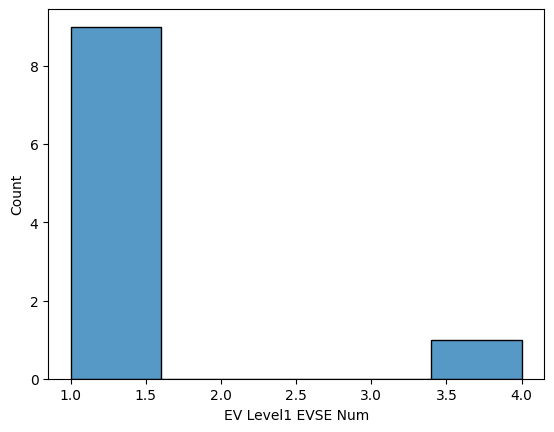

In [ ]:
sns.histplot(dataset_df['EV Level1 EVSE Num'])

In [ ]:
dataset_df['EV Level1 EVSE Num'].fillna(0, inplace=True)

<Axes: xlabel='EV Level2 EVSE Num', ylabel='Count'>

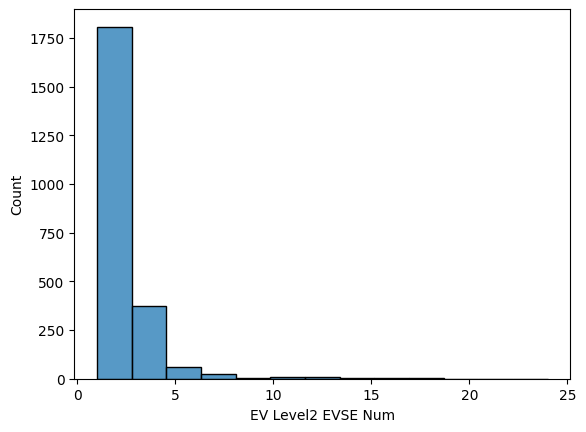

In [ ]:
sns.histplot(dataset_df['EV Level2 EVSE Num'])

In [ ]:
dataset_df['EV Level2 EVSE Num'].fillna(0, inplace=True)

<Axes: xlabel='EV DC Fast Count', ylabel='Count'>

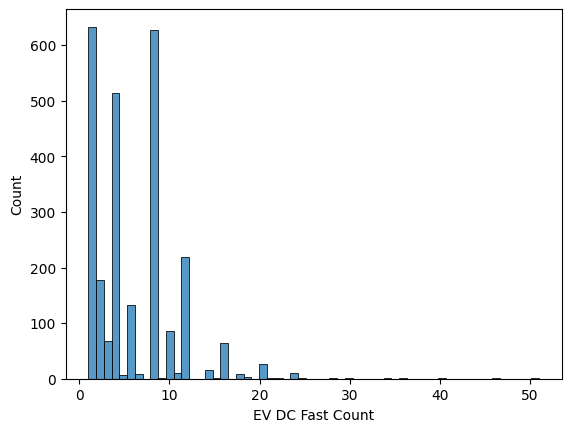

In [ ]:
sns.histplot(dataset_df['EV DC Fast Count'])

In [ ]:
dataset_df['EV DC Fast Count'].fillna(0, inplace=True)

In [ ]:
ev_networks_list = dataset_df['EV Network'].value_counts().index.to_list()[:15]
ev_networks_list = ['ChargePoint Network',
                    'Non-Networked',
                    'Blink Network',
                    'Tesla',
                    'Volta',
                    'EV Connect',
                    'SHELL_RECHARGE',
                    'eVgo Network',
                    'Electrify America',
                    'AMPUP',
                    'FLO',
                    'RIVIAN',
                    'LIVINGSTON']

In [ ]:
for network in ev_networks_list:
    dataset_df['Network_' + network] = dataset_df['EV Network'].apply(lambda x: 1 if network in str(x) else 0)
dataset_df.drop('EV Network', axis=1, inplace=True)
    

In [ ]:
dataset_df['EV Pricing'].value_counts()[:20]

EV Pricing
Free                                                                                                         890
FREE                                                                                                          34
$2.00/Hr Parking Fee                                                                                          10
$1.00/Hr Parking Fee                                                                                           8
Level 2: $4 per session or $19.99 for monthly plan, DC Fast: $7.50 per session or $19.99 for monthly plan      8
DC Fast: $7.50 per session or $19.99 for monthly plan, Level 2: $4 per session or $19.99 for monthly plan      6
Free; parking fee                                                                                              3
$1.50/Hr Parking Fee                                                                                           3
$0.00-$10.00/Hr Variable Parking Fee, $0.30/kWh Energy Fee                           

In [ ]:
def get_electric_price(x):
    x = str(x)
    if x.lower() == 'free':
        return 0
    # Extract hourly rate
    rate = re.findall(r'(\$\d+\.?\d*)-(\$\d+\.?\d*)/kWh \w+ Energy Fee', x)
    if not rate:
        rate = re.findall(r'(\$\d+\.?\d*)/kWh Energy Fee', x)
    if not rate:
        rate = re.findall(r'(\$\d+\.?\d*) per kWh', x)
    # Convert to float if rate is found else return None
    rate = re.findall(r'\d+\.?\d*', str(rate))
    for i in range(len(rate)):
        rate[i] = float(rate[i])
    if rate:
        return np.mean(rate)
    else:
        return -1

In [ ]:
def get_park_price(x):
    x = str(x)
    if str(x).lower() == 'free':
        return 0
    # Extract hourly rate
    hourly_rate = re.findall(r'(\$\d+\.?\d*)-(\$\d+\.?\d*)/Hr \w+ Parking Fee', x)
    if not hourly_rate:
        hourly_rate = re.findall(r'(\$\d+\.?\d*)/Hr Parking Fee', x)
    # Convert to float if hourly_rate is found else return None
    hourly_rate = re.findall(r'\d+\.?\d*', str(hourly_rate))
    for i in range(len(hourly_rate)):
        hourly_rate[i] = float(hourly_rate[i])
    if hourly_rate:
        return np.mean(hourly_rate)
    else:
        return -1
                                                                 

In [ ]:
dataset_df['park_price'] = dataset_df['EV Pricing'].apply(get_park_price)
dataset_df['electric_price'] = dataset_df['EV Pricing'].apply(get_electric_price)
dataset_df.drop('EV Pricing', axis=1, inplace=True)

In [ ]:
dataset_df.drop(['Station Name', 'Street Address', 'Access Days Time', 
                 'Date Last Confirmed', 'Open Date', 'NPS Unit Name'], axis=1, inplace=True)

In [ ]:
dataset_dummies = pd.get_dummies(dataset_df['Owner Type Code'], prefix='Owner_Type')
dataset_df = pd.concat([dataset_df, dataset_dummies], axis=1)
dataset_df.drop('Owner Type Code', axis=1, inplace=True)

In [ ]:
dataset_df['EV Connector Types'].value_counts().head()

EV Connector Types
J1772                       1394
TESLA                       1354
CHADEMO J1772COMBO          1095
J1772 TESLA                  356
CHADEMO J1772 J1772COMBO     232
Name: count, dtype: int64

In [ ]:
connector_list = ['NEMA1450', 'NEMA515', 'NEMA520', 
                  'J1772', 'J1772COMBO', 'CHADEMO', 'TESLA']
for connector in connector_list:
    dataset_df['Connector_' + connector] = dataset_df['EV Connector Types'].apply(lambda x: 1 if connector in str(x) else 0)
dataset_df.drop('EV Connector Types', axis=1, inplace=True)

In [ ]:
dataset_df['EV On-Site Renewable Source'].value_counts()

EV On-Site Renewable Source
SOLAR    8
HYDRO    4
NONE     1
Name: count, dtype: int64

In [ ]:
dataset_dummies = pd.get_dummies(dataset_df['EV On-Site Renewable Source'], prefix='Renewable_Source')
dataset_df = pd.concat([dataset_df, dataset_dummies], axis=1)
dataset_df.drop('EV On-Site Renewable Source', axis=1, inplace=True)

In [ ]:
dataset_df['Maximum Vehicle Class'].value_counts()

Maximum Vehicle Class
LD    769
MD     11
HD      3
Name: count, dtype: int64

In [ ]:
def map(x):
    if x == 'LD':
        return 1
    elif x == 'MD':
        return 2
    elif x == 'HD':
        return 3
    else:
        return 0

dataset_df['Maximum_Vehicle_Class_Num'] = dataset_df['Maximum Vehicle Class'].apply(map)
dataset_df.drop('Maximum Vehicle Class', axis=1, inplace=True)

In [ ]:
facilities = dataset_df['Facility Type'].value_counts()[:10].index.to_list()
facilities

['HOTEL',
 'SHOPPING_CENTER',
 'CAR_DEALER',
 'GAS_STATION',
 'GROCERY',
 'CONVENIENCE_STORE',
 'RESTAURANT',
 'PARKING_LOT',
 'INN',
 'SHOPPING_MALL']

In [ ]:
for facility in facilities:
    dataset_df['Facility_' + facility] = dataset_df['Facility Type'].apply(lambda x: 1 if facility in str(x) else 0)

In [ ]:
dataset_df.drop('Facility Type', axis=1, inplace=True)

In [ ]:
dataset_df['Restricted Access'] = dataset_df['Restricted Access'].apply(lambda x: 1 if x == 'True' else 0)

In [ ]:
dataset_df['EV Workplace Charging'] = dataset_df['EV Workplace Charging'].apply(lambda x: 1 if x == 'True' else 0)

In [ ]:
dataset_df.to_csv('data/processed_nrel.csv', index=False)